# Projeto 2
### Análise de Teste tipo A/B

___
#### <font color='red'>Gabriel Moreira, Leonardo Lamounier Grotti, Patrick Serrano Wiegerinck e Rodrigo Cavalieri Lino</font>

## Introdução

### Teste A/B
O projeto em questão tem como objetivo aplicar velhos e novos conceitos de estatística em um exercício de otimização de site. A conclusão do projeto resultará no aperfeiçoamento e agilização da navegação dentro do site utilizado como base de trabalho. Uma técnica muito utilizada por grandes empresas como Google e Amazon nessa tarefa é conhecido como Teste A/B, em que são criada duas versões distintas de uma mesma página da web, por exemplo, em que apenas alguns detalhes são modificados, permitindo um estudo mais preciso do tempo de navegação pelo site.
### Formas de realizar o Teste A/B
O teste pode ser feito em relação a vários detalhes do layout de um site, algumas dessas características são:

- Headlines de sites
- Call-to-action (botões para conversões)
- Imagens ou vídeos
- Tamanho e campos de formulário

### Teste A/B no projeto 2
Com o auxílio de ferramentas de programação do Python será reliazado um Teste A/B, porém numa escala muito menor do que as feitas por grandes empresas, em relação a um site gerado pelos alunos da engenharia do Insper no curso de Co-Design de Aplicativos. Com o fim do estudo sobre o Teste A/B, espera-se ser capaz de gerar uma conclusão em relação as duas versões do site, identificando qual delas representada uma maior otimização da navegação pelo site. O detalhe escolhido para ser avaliado ao longo do Teste A/B foi o botão de navegação para a páginal do perfil do aluno, ou seja, o ícone que, ao ser clicado, direciona o usuário do site ao perfil do aluno, onde se encontram as informações pessoais, em outras palavras será analisado a característica apresentada como Call-to-action.

Para realizar a análise desse teste foram obtidos dados do tempo de início do teste, no momento em que usuário é direcionado a uma das versões do site, e do fim do teste, quando o usuário alcança o objetivo, ou seja, clicou no botão do perfil do aluno. Com esses dados, foram calculados o período de tempo, delta tempo, que cada usuário demorou para concluir sua navegação em ambas as versões. Esses intervalos de tempo geraram duas listas de tempo, que representam variáveis aleatórias e independentes.

#### Teste A
O teste A representa a versão original do site, sem nenhuma alteração.
#### Teste B
O teste B representa a versão modificada do site, em que o botão para conversão que leva o usuário à página do perfil do aluno foi circulado por uma corda branca.
#### Teste A/B
O resultado esperado é de que a versão B tenha uma reação mais rápida por parte dos usuários. Essa foi a hipótese inicial, uma vez que imagina-se que a corda branca ao redor do botão torne o ícone mais evidente e, portanto, de mais rápida navegação.

___
## Análise Descritiva

Importando as ferramentas para a análise dos dados:

In [2]:
import pandas as pd
import json
import itertools
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Exportando o arquivo json do Firebase:

In [3]:
arquivo = open("testef-export.json")
linhas = arquivo.readlines()
texto = "".join(linhas)
dados_fire = json.loads(texto)

Análise do atributo logs:

In [4]:
for k,v in dados_fire["logs"].items():
    for chave, valor in v.items():
        pass

Convertendo os dados obtidos do Firebase em um dataframe:

In [5]:
lista_dicionarios = []

for k,v in dados_fire["logs"].items():
    lista_dicionarios.append(v)

Convertendo a lista de dicionários em um dataframe:

In [6]:
dataframe = pd.DataFrame.from_records(lista_dicionarios)

Criando um dataframe dos intervalos de tempo (delta T):

In [7]:
agrupado = dataframe.groupby(by=["user_id", "versao"])
users = set(dataframe.user_id)
users = list(users)

Separando os grupos de usuários de cada versão do Teste A/B:

In [8]:
resultados = []

for u in users:
    for versao in ["A", "B"]:
        if (u, versao) in agrupado.groups.keys(): # Check if a specific pair user/type of test happened
            grupo =  agrupado.get_group((u, versao))
            grupo = grupo.sort_values(by="tempo") # Para evitar que inícios sem fim gerem tempos negativos
            
            if len(grupo[grupo.tipo=="final"])>= 1 and len(grupo[grupo.tipo=="inicio"]) >= 1:
                delta_t = grupo[grupo.tipo=="final"].iloc[-1].tempo - grupo[grupo.tipo=="inicio"].iloc[0].tempo
                resultados.append({"user_id":u, "delta_t":delta_t, "versao":versao})

In [9]:
dataframe_resumo = pd.DataFrame.from_records(resultados)

Transformando o tempo em segundos:

In [10]:
dataframe_resumo.delta_t/=1000

Histogramas:

In [11]:
faixa = np.arange(0,200,5)

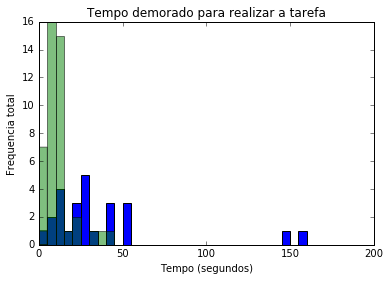

In [12]:
tempos_A = list(dataframe_resumo[dataframe_resumo.versao=="A"].delta_t)
tempos_B = list(dataframe_resumo[dataframe_resumo.versao=="B"].delta_t)
plt.hist(tempos_A, bins=faixa)
plt.hist(tempos_B, bins=faixa, alpha=0.5)
plt.title('Tempo demorado para realizar a tarefa')
plt.xlabel('Tempo (segundos)')
plt.ylabel('Frequencia total')

____

#### Analisando os dados

## I)

Nessa fase será analisado se com a mudança no layout da página B a navegação se tornou mais rápida. Para verificar se essa afirmação é verdadeira ou falsa, foram criadas as seguintes hipóteses:

H0 (hipótese nula):
\begin{equation*}
E(B)-E(A)>= 0
\end{equation*}

Ha (hipótese alternativa) :
\begin{equation*}
E(B)-E(A) < 0
\end{equation*}

Sendo que E(B) é igual a média dos intervalos de tempo de navegação na versão "B", assim como E(a) é igual a média dos intervalos de tempo de navegação na versão "A".

Por não conhecermos a varância populacional, será utilizado a Distribuição t-Student na análise do problema. Nesse caso, utilizaremos nível de significância de 5%.

## II)

##### O próximo passo é calcular a média e a variância combinada, para isso, teremos que calcular as médias e as variâncias dos dados "A" e "B"

___
### Teste A

Definindo a lista de tempo da versão A:

In [13]:
tA = []

for i in range(len(tempos_A)):
    if tempos_A[i] <= 200:
        tA.append(tempos_A[i])

Cálculo da Média Amostral:

In [14]:
Tota = 0
a = 0

for i in tA:
    a += 1
    Tota += i

media_A = Tota/a
print("A média amostral do tempo de navegação da versão A é: {0}".format(media_A))

A média amostral do tempo de navegação da versão A é: 37.008160000000004


Cálculo da variância:

In [15]:
VarA = np.var(tA)
print("A variância do tempo de navegação da versão A é: {0}".format(VarA))

A variância do tempo de navegação da versão A é: 1341.6444177344


Cálculo do desvio padrão:

In [16]:
dpA = VarA**0.5
print("O desvio padrão do tempo de navegação da versão A é: {0}".format(dpA))

O desvio padrão do tempo de navegação da versão A é: 36.62846458335921


___
### Teste B

Definindo a lista de tempo para a versão B:

In [17]:
tB = []

for i in range(len(tempos_B)):
    if tempos_B[i] <= 200:
        tB.append(tempos_B[i])

Cálculo da Média Amostral:

In [18]:
Totb = 0
b = 0

for i in tB:
    b += 1
    Totb += i

media_B = Totb/b
print("A média amostral do tempo de navegação da versão B é: {0}".format(media_B))

A média amostral do tempo de navegação da versão B é: 11.052045454545455


Cálculo da variância:

In [19]:
VarB = np.var(tB)
print("A variância do tempo de navegação da versão B é: {0}".format(VarB))

A variância do tempo de navegação da versão B é: 73.08351472520661


Cálculo do desvio padrão:

In [20]:
dpB = VarB**0.5
print("O desvio padrão do tempo de navegação da versão B é: {0}".format(dpB))

O desvio padrão do tempo de navegação da versão B é: 8.54888967791763


___

Cálculo da média:

\begin{equation*}
E(Xa - Xb) = E(Xa) - E(Xb)
\end{equation*}
que de acordo com a hipótese nula é maior ou igual a 0.

Como não temos o desvio padrão populacional devemos estimá-los, para as duas versões do site.

In [21]:
# Média geral

mg = (media_A - media_B)

print("A média geral é :{0}".format(mg))

A média geral é :25.956114545454547


Para o calculo da variância geral teremos que usar a fórmula abaixo

In [22]:
# variância geral

Vg = ((a-1)*VarA+(b-1)*VarB)/(a+b-2)
print("A variância geral é :{0}".format(Vg))


A variância geral é :527.4933904299922


In [23]:
# grau de liberdade
gl = (a+b-2)
print("O grau de liberdade é :{0}".format(gl))

O grau de liberdade é :67


## III)

##### Agora usaremos a tabela do t-student para calcular o T crítico e depois calcularemos o T observado. Com esses dois dados já poderemos tirar algumas conclusões.

Usando alfa igual a 5% e arredondando o grau de liberdade para 60, uma vez que não havia número mais próximo na tabela encontramos o t crítico = 2.00

In [24]:
Tcritico = 2


Para encontrar o T observado usaremos a fórmula abaixo

In [25]:
# tobs
tobs = ((media_B - media_A)-0)/(((Vg)**0.5)/(a+b)**0.5)
print("O Tobs é : {0}".format(tobs))

O Tobs é : -9.387624642228776


Dado que o Tobs pertence à região crítica, portanto Tobs < -tc, podemos rejeitar a hipótese nula (H0).

## IV)

#### O último passo é calcular para que valor de alfa a hipótese nula não é recusada.

Calcula-se o valor-p para saber quais valores de alfa não rejeitam a hipótese nula, lembrando, de acordo com a literatura, o valor máximo de alfa é igual a 10%. Olhando na tabela, para um valor de tobs aproximado, percebe-se que não existe um valor alfa que deixe de negar H0.

___
## Conclusão

Com isso concluimos que a mudança feita no layout da página otimizou a navegação do usuário, pois a hipótese nula, que afirmava que o intervalo de tempo em que um usuário demorava para atingir o objetivo na versão "B" era maior do que o intervalo na "A", foi negada. Como foi demonstarado anteriormente o t observado (tobs) pertence a região crítica, concluindo, com isso, que a hipótese nula é falsa e, portanto, a hipótese alternativa é verdadeira. Em suma, pode-se dizer que o tempo médio de navegação na versão "B" é menor do que na "A".

Com as médias amostrais calculadas na fase "II)" da análise descritiva, verifica-se que houve uma redução de 70% na duração de navegação da versão "A" para a "B". Deve-se lembrar que esse valor foi calculado para servir apenas como curiosidade e não foi utilizado no projeto.